# Линейная регрессия (продолжение).

# Задание 1

Поработаем с датасетом Бостон.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\AppData\Roaming\Python\Python37\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X_full = data.data
y_full = data.target

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации.

In [12]:
from sklearn import metrics

sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
model2 = RandomForestRegressor()

print(cross_val_score(model, X_full, y_full, cv=3, scoring='r2').mean())
print(cross_val_score(model2, X_full, y_full, cv=3, scoring='r2').mean())

-1.5841985220996833
0.5560020349952768


Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [51]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.25, random_state=234)

model = LinearRegression()

model.fit(Xtrain, ytrain) 

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [52]:
from sklearn.metrics import r2_score

print(r2_score(ytrain, pred_train))
print(r2_score(ytest, pred_test))

0.7463537829863247
0.7170860013891196


Нарисуем матрицу корреляций признаков.

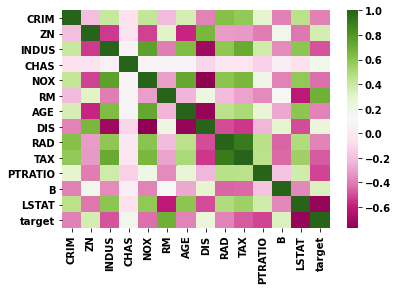

In [95]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

corr = data1.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

In [96]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Посмотрим на значение коэффициентов корреляции признаков с таргетом.

In [97]:
data1[data1.columns[1:]].corr()['target'][:-1]

ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Name: target, dtype: float64

In [98]:
y = data1['target']

X = data1.drop('target', axis=1)

DIS - сильно коррелирует с другими признаками и при этом не коррелирует с таргетом, поэтому пробуем его удалить.

In [99]:
del X['DIS']

In [100]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean()

-0.614300046774462

In [101]:
data1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

CRIM


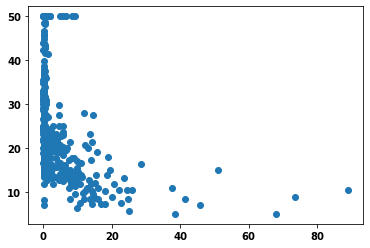

ZN


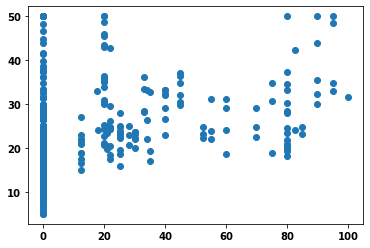

INDUS


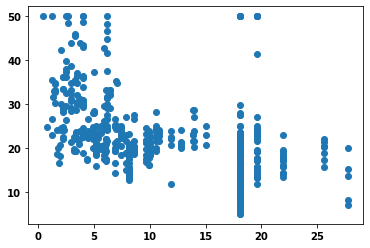

CHAS


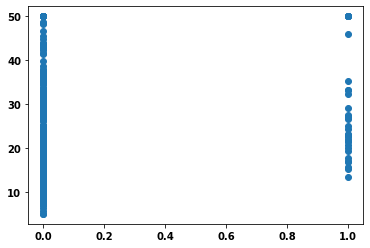

NOX


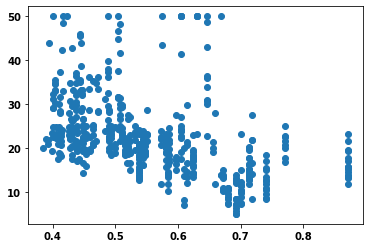

RM


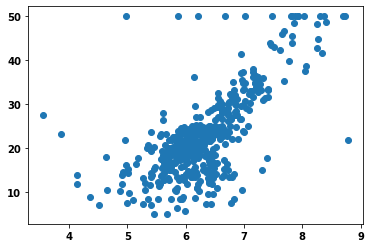

AGE


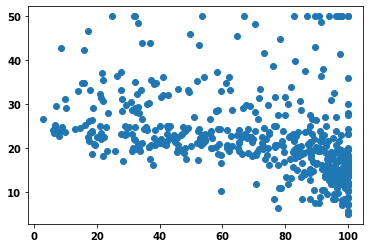

DIS


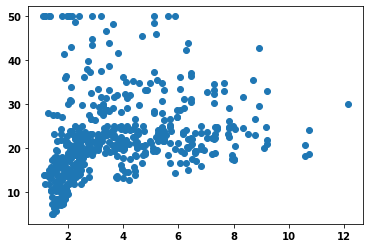

RAD


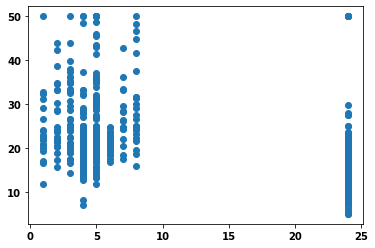

TAX


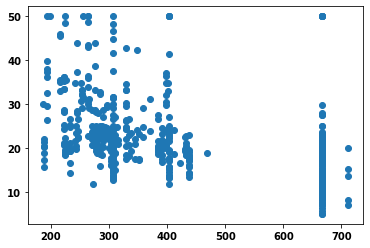

PTRATIO


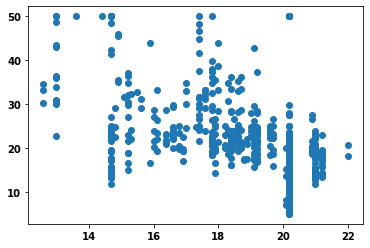

B


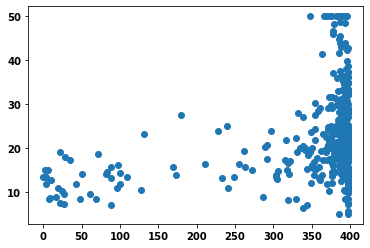

LSTAT


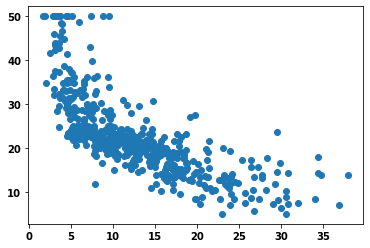

In [102]:
for c in data1.columns:
    if c != 'target':
        print(c)
        scatter(data1[c], data1['target'])
        show()

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество

In [103]:
X['LSTAT_sq'] = 1. / X['LSTAT']

cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean()

0.35761689556130544

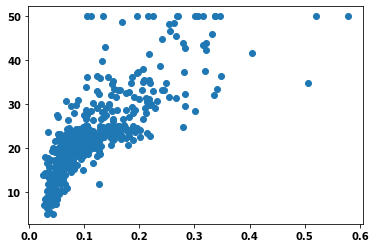

In [116]:
scatter(X['LSTAT_sq'], y)

In [104]:
del X['LSTAT']

cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean()

0.3416153694368654

In [105]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

model = LinearRegression()

model.fit(Xtrain, ytrain) 

for a,b in zip(X.columns, model.coef_):
    print(a,b)

CRIM -0.15332294975248925
ZN -0.02640488347931086
INDUS 0.00816580805358925
CHAS 2.4208445136327867
NOX -12.06449965812892
RM 2.853364586786856
AGE 0.03362113453492587
RAD 0.29291414493869006
TAX -0.010859485464624211
PTRATIO -0.9514393038657717
B 0.007940130482628687
LSTAT_sq 63.88275596498803


In [107]:
np.corrcoef(X['NOX'], X['RM'])[0][1]

-0.3021881878495937

In [111]:
X['NOX*RM'] = X['NOX'] * X['RM']

del X['NOX']

In [112]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean()

0.34620784585971137

Первый подход - меняем модель на более сложную.

Подходы к улучшению качества, не меняя модель:

1) Искать мультиколлинеарность, удалять зависимые признаки. +

2) Пытаться удалить некоррелирующие с таргетом признаки. -

в линейной модели:

3) Смотрим на графики зависимости таргета с каждым признаком в отдельности, и пытаемся брать функции от признаков (квадрат, синус, экспонента...) +

4) Добавляем нелинейные взаимодействия признаков (a*b, a**b ит.д.) -

Послевательно добавляйте новые признаки, после каждого шага смотрите, как изменилось качество модели на кросс-валидации:
    
    * квадрат признака, имеющего наибольшую по модулю корреляцию с таргетом
    * произведение двух признаков, имеющих наибольшую по модулю корреляцию с таргетом

In [ ]:
#your code here

# Задание 3 

Примените линейную регрессию к данным, сгенерированным ниже. Какая получилась ошибка? Как улучшить модель?

In [ ]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])

plt.scatter(x,y)

In [ ]:
#your code here